In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error as mse

np.random.seed(42)

In [2]:
def plot(x,y):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Sinusoidal Function')
    plt.show()

### Draw a period of the given sinusoidal function

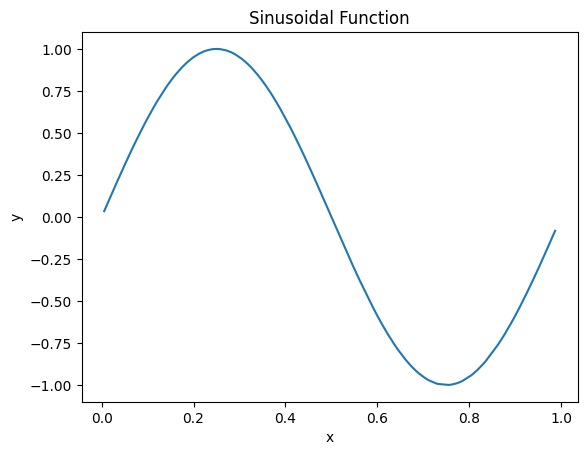

In [3]:
N = 200
x = np.sort(np.random.uniform(0, 1, N))   # Generate N samples uniformly distributed in [0, 1]
y = np.sin(2*np.pi*x)   # Compute y values for sin(2*pi*x)

plot(x,y)

### To every y(x) add Gaussian noise

In [4]:
noise = np.random.normal(0, 1, N)   # Generate N samples of Gaussian noise with mean 0 and standard deviation 1

y = y + noise   # Add noise to the true y values to generate noisy observations

### Fit polynomial models 

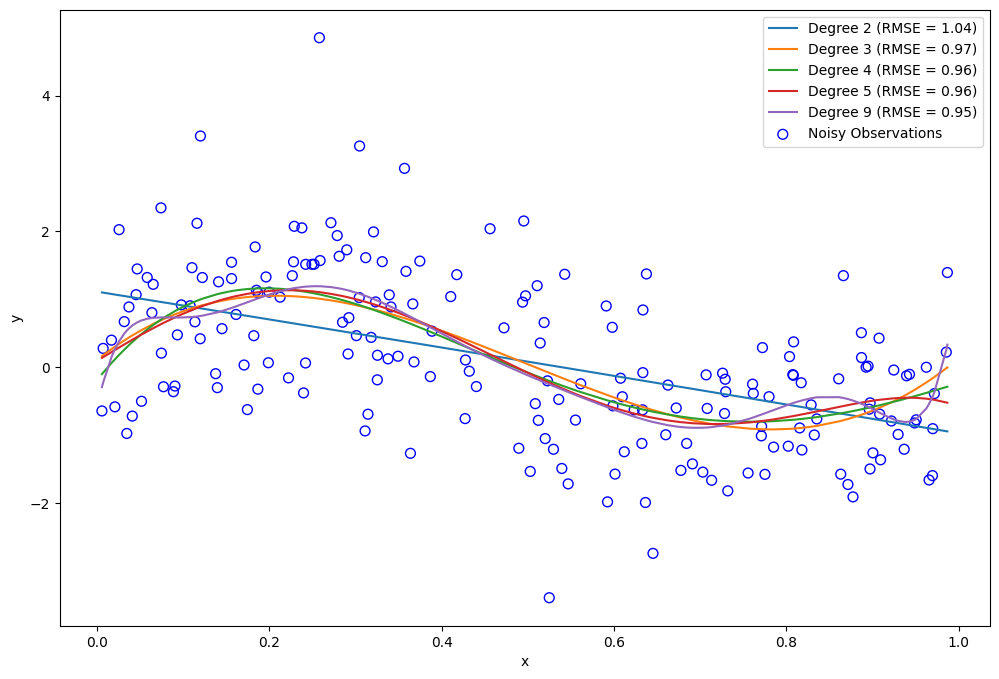

In [8]:
M = [2,3,4,5,9]

coef = []
RMSE = []

# Create a plot with all the models
plt.figure(figsize=(12, 8))

for m in M:
    
    poly = PolynomialFeatures(degree=m, include_bias=False)
 
    X_poly = poly.fit_transform(x.reshape(-1,1))
    
    # fit polynomical regression model
    model = LinearRegression()
    model.fit(X_poly,y)
    
    y_pred = model.predict(X_poly)
    rmse = np.sqrt(mse(y, y_pred))
    RMSE.append(np.sqrt(mse(y, y_pred)))

    coef.append(model.coef_)
    # Plot the model
    plt.plot(x, y_pred, label=f'Degree {m} (RMSE = {rmse:.2f})')

plt.scatter(x, y, s=50, facecolors='none', edgecolors='b', label='Noisy Observations')
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
RMSE

[1.0389274675418676,
 0.9669929694698778,
 0.9619557319788312,
 0.9587866959454022,
 0.9471666972892422]

In [11]:
coef = pd.DataFrame(coef)
coef['RMSE'] = RMSE
coef

,0,1,2,3,4,5,6,7,8,rmse,RMSE
0,-2.036729,-0.049119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.038927,1.038927
1,9.998063,-30.553299,20.576090,NaN,NaN,NaN,NaN,NaN,NaN,0.966993,0.966993
2,15.976649,-58.054581,64.104391,-22.074453,NaN,NaN,NaN,NaN,NaN,0.961956,0.961956
3,7.794371,-1.088314,-88.055918,149.871513,-69.195705,NaN,NaN,NaN,NaN,0.958787,0.958787
4,59.602349,-1042.961365,9089.492096,-43035.844277,118729.005776,-197251.847331,194574.547167,-104925.704329,23805.687426,0.947167,0.947167
